# 10 minutes of Koalas

This is a short introduction to Koalas, geared mainly for new users. This notebook shows you some key differences between pandas and Koalas. 

Save Koalas  - Help Australia bush fires

Customarily, we import Koalas as follows:

In [2]:
dbutils.library.installPyPI("koalas")
dbutils.library.restartPython()

In [3]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

## Object Creation

Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [6]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [7]:
s

Out[3]: 0 1.0
2 5.0
4 6.0
1 3.0
3 NaN
5 8.0
Name: 0, dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [10]:
kdf

,a,b,c
10,1,100,one
30,3,300,three
50,5,500,five
20,2,200,two
40,4,400,four
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [12]:
dates = pd.date_range('20200807', periods=6)

In [13]:
dates

Out[8]: DatetimeIndex(['2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
 '2020-08-11', '2020-08-12'],
 dtype='datetime64[ns]', freq='D')

In [14]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [15]:
pdf

,A,B,C,D
2020-08-07,1.180985,1.355361,0.064902,-0.427833
2020-08-08,0.739272,2.078894,-0.313976,-1.320815
2020-08-09,-0.519808,0.236781,1.398889,-0.901271
2020-08-10,0.616167,0.093237,-0.232135,0.392622
2020-08-11,-1.763562,0.759824,1.135574,-1.628132
2020-08-12,-1.103867,-0.175741,-0.097121,0.937798


Now, this pandas DataFrame can be converted to a Koalas DataFrame

In [17]:
kdf = ks.from_pandas(pdf)

In [18]:
type(kdf)

Out[12]: databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

In [20]:
kdf

,A,B,C,D
2020-08-07,1.180985,1.355361,0.064902,-0.427833
2020-08-09,-0.519808,0.236781,1.398889,-0.901271
2020-08-11,-1.763562,0.759824,1.135574,-1.628132
2020-08-10,0.616167,0.093237,-0.232135,0.392622
2020-08-12,-1.103867,-0.175741,-0.097121,0.937798
2020-08-08,0.739272,2.078894,-0.313976,-1.320815


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame

In [22]:
spark = SparkSession.builder.getOrCreate()

In [23]:
sdf = spark.createDataFrame(pdf)

In [24]:
sdf.show()

+--------------------+-------------------+--------------------+-------------------+
 A| B| C| D|
+--------------------+-------------------+--------------------+-------------------+
-0.41561941643943245| 0.6088677735053069|0.001415055528100...|-0.8912337145420149|
 -0.804024015234055|-1.6151263724060265| -0.7530347409352232|0.30817383674416615|
 -1.3472571507106392|0.28152909701528256| -1.5022403064464835| 1.1756359445334685|
 0.3841836696518323|-0.3969830238951925| 0.7531756204678735|-0.9304738965734425|
 -1.47321999149646|-1.2987505061556188| -0.913074947213097|-0.2241701962968984|
 -1.432161857979585|-1.2941850008253615|-0.02760079949098...| 0.8018570344620859|
+--------------------+-------------------+--------------------+-------------------+

Creating Koalas DataFrame from Spark DataFrame.
`to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

In [26]:
kdf = sdf.to_koalas()

In [27]:
kdf

,A,B,C,D
0,1.180985,1.355361,0.064902,-0.427833
1,0.739272,2.078894,-0.313976,-1.320815
2,-0.519808,0.236781,1.398889,-0.901271
3,0.616167,0.093237,-0.232135,0.392622
4,-1.763562,0.759824,1.135574,-1.628132
5,-1.103867,-0.175741,-0.097121,0.937798


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [29]:
kdf.dtypes

Out[19]: A float64
B float64
C float64
D float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [32]:
kdf.head()

,A,B,C,D
0,1.180985,1.355361,0.064902,-0.427833
1,0.739272,2.078894,-0.313976,-1.320815
2,-0.519808,0.236781,1.398889,-0.901271
3,0.616167,0.093237,-0.232135,0.392622
4,-1.763562,0.759824,1.135574,-1.628132


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [34]:
kdf.index

Out[21]: Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [35]:
kdf.columns

Out[22]: Index(['A', 'B', 'C', 'D'], dtype='object')

In [36]:
kdf.to_numpy()

Out[23]: array([[ 1.18098492, 1.35536078, 0.06490174, -0.42783256],
 [ 0.7392725 , 2.0788937 , -0.31397608, -1.32081493],
 [-0.51980757, 0.23678124, 1.39888857, -0.90127119],
 [ 0.61616693, 0.09323656, -0.23213549, 0.39262176],
 [-1.76356242, 0.75982445, 1.13557409, -1.62813225],
 [-1.10386698, -0.1757406 , -0.09712087, 0.93779766]])

Describe shows a quick statistic summary of your data

In [38]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.141802,0.724726,0.326022,-0.491272
std,1.166117,0.857952,0.744955,0.997620
min,-1.763562,-0.175741,-0.313976,-1.628132
25%,-1.103867,0.093237,-0.232135,-1.320815
50%,-0.519808,0.236781,-0.097121,-0.901271
75%,0.739272,1.355361,1.135574,0.392622
max,1.180985,2.078894,1.398889,0.937798


Transposing your data

In [40]:
kdf.T

,0,1,2,3,4,5
A,1.180985,0.739272,-0.519808,0.616167,-1.763562,-1.103867
C,0.064902,-0.313976,1.398889,-0.232135,1.135574,-0.097121
B,1.355361,2.078894,0.236781,0.093237,0.759824,-0.175741
D,-0.427833,-1.320815,-0.901271,0.392622,-1.628132,0.937798


Sorting by its index

In [42]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,-1.103867,-0.175741,-0.097121,0.937798
4,-1.763562,0.759824,1.135574,-1.628132
3,0.616167,0.093237,-0.232135,0.392622
2,-0.519808,0.236781,1.398889,-0.901271
1,0.739272,2.078894,-0.313976,-1.320815
0,1.180985,1.355361,0.064902,-0.427833


Sorting by value

In [44]:
kdf.sort_values(by='B')

,A,B,C,D
5,-1.103867,-0.175741,-0.097121,0.937798
3,0.616167,0.093237,-0.232135,0.392622
2,-0.519808,0.236781,1.398889,-0.901271
4,-1.763562,0.759824,1.135574,-1.628132
0,1.180985,1.355361,0.064902,-0.427833
1,0.739272,2.078894,-0.313976,-1.320815


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [46]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [47]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [48]:
kdf1 = ks.from_pandas(pdf1)

In [49]:
kdf1

,A,B,C,D,E
2020-08-08,0.739272,2.078894,-0.313976,-1.320815,1.0
2020-08-10,0.616167,0.093237,-0.232135,0.392622,NaN
2020-08-07,1.180985,1.355361,0.064902,-0.427833,1.0
2020-08-09,-0.519808,0.236781,1.398889,-0.901271,NaN


To drop any rows that have missing data.

In [51]:
kdf1.dropna(how='any')

,A,B,C,D,E
2020-08-08,0.739272,2.078894,-0.313976,-1.320815,1.0
2020-08-07,1.180985,1.355361,0.064902,-0.427833,1.0


Filling missing data.

In [53]:
kdf1.fillna(value=5)

,A,B,C,D,E
2020-08-07,1.180985,1.355361,0.064902,-0.427833,1.0
2020-08-09,-0.519808,0.236781,1.398889,-0.901271,5.0
2020-08-10,0.616167,0.093237,-0.232135,0.392622,5.0
2020-08-08,0.739272,2.078894,-0.313976,-1.320815,1.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [56]:
kdf.mean()

Out[34]: A -0.141802
B 0.724726
C 0.326022
D -0.491272
Name: 0, dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

In [58]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [59]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

145 ms ± 64.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [60]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

817 ms ± 46.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [61]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [63]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [64]:
kdf

,A,B,C,D
0,foo,one,0.203087,-1.639353
2,foo,two,0.221384,1.747376
4,foo,two,0.914385,-0.986420
6,foo,one,0.404760,-1.273971
1,bar,one,-0.481974,-0.147223
3,bar,three,1.203870,-0.255860
5,bar,two,0.139657,-1.036793
7,foo,three,-0.758140,1.097831


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [66]:
kdf.groupby('A').sum()

,C,D
A,,
foo,0.985477,-1.054538
bar,0.861553,-1.439876


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [68]:
kdf.groupby(['A', 'B']).sum()

C 
 D 
 
 
 A 
 B 
 
 
 
 
 
 
 foo 
 two 
 1.135769 
 0.760955 
 
 
 bar 
 two 
 0.139657 
 -1.036793 
 
 
 one 
 -0.481974 
 -0.147223 
 
 
 foo 
 one 
 0.607848 
 -2.913324 
 
 
 bar 
 three 
 1.203870 
 -0.255860 
 
 
 foo 
 three 
 -0.758140 
 1.097831

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [70]:
%matplotlib inline
from matplotlib import pyplot as plt

In [71]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [72]:
kser = ks.Series(pser)

In [73]:
kser

Out[48]: 2000-01-01 0.899769
2000-01-02 0.899769
2000-01-03 0.899769
2000-01-04 0.899769
2000-01-05 1.285249
2000-01-06 1.285249
2000-01-07 1.285249
2000-01-08 1.285249
2000-01-09 1.285249
2000-01-10 1.285249
2000-01-11 2.222229
2000-01-12 2.222229
2000-01-13 2.222229
2000-01-14 2.222229
2000-01-15 2.222229
2000-01-16 2.222229
2000-01-17 2.222229
2000-01-18 2.222229
2000-01-19 2.222229
2000-01-20 2.222229
2000-01-21 2.222229
2000-01-22 2.222229
2000-01-23 2.222229
2000-01-24 2.222229
2000-01-25 2.222229
2000-01-26 2.222229
2000-01-27 2.222229
2000-01-28 2.222229
2000-01-29 2.222229
2000-01-30 2.222229
2000-01-31 2.222229
2000-02-01 2.222229
2000-02-02 2.222229
2000-02-03 2.222229
2000-02-04 2.222229
2000-02-05 2.222229
2000-02-06 2.222229
2000-02-07 2.222229
2000-02-08 2.222229
2000-02-09 2.222229
2000-02-10 2.222229
2000-02-11 2.222229
2000-02-12 2.222229
2000-02-13 2.222229
2000-02-14 2.222229
2000-02-15 2.222229
2000-02-16 2.222229
2000-02-17 2.222229
2000-02-18 2.222229
2000-02-19 2.222229
2000-02-20 2.222229
2000-02-21 2.222229
2000-02-22 2.222229
2000-02-23 2.222229
2000-02-24 2.222229
2000-02-25 2.222229
2000-02-26 2.222229
2000-02-27 2.222229
2000-02-28 2.222229
2000-02-29 2.222229
2000-03-01 2.222229
2000-03-02 2.407047
2000-03-03 2.407047
2000-03-04 2.407047
2000-03-05 2.407047
2000-03-06 2.407047
2000-03-07 2.407047
2000-03-08 2.407047
2000-03-09 2.407047
2000-03-10 2.407047
2000-03-11 2.407047
2000-03-12 2.407047
2000-03-13 2.407047
2000-03-14 2.407047
2000-03-15 2.407047
2000-03-16 2.407047
2000-03-17 2.407047
2000-03-18 2.407047
2000-03-19 2.407047
2000-03-20 2.407047
2000-03-21 2.407047
2000-03-22 2.407047
2000-03-23 2.407047
2000-03-24 2.407047
2000-03-25 2.407047
2000-03-26 2.407047
2000-03-27 2.407047
2000-03-28 2.407047
2000-03-29 2.407047
2000-03-30 2.407047
2000-03-31 2.407047
2000-04-01 2.407047
2000-04-02 2.407047
2000-04-03 2.407047
2000-04-04 2.407047
2000-04-05 2.407047
2000-04-06 2.407047
2000-04-07 2.407047
2000-04-08 2.407047
2000-04-09 2.407047
2000-04-10 2.407047
2000-04-11 2.407047
2000-04-12 2.407047
2000-04-13 2.407047
2000-04-14 2.407047
2000-04-15 2.407047
2000-04-16 2.407047
2000-04-17 2.407047
2000-04-18 2.407047
2000-04-19 2.407047
2000-04-20 2.407047
2000-04-21 2.407047
2000-04-22 2.407047
2000-04-23 2.407047
2000-04-24 2.407047
2000-04-25 2.407047
2000-04-26 2.407047
2000-04-27 2.407047
2000-04-28 2.407047
2000-04-29 2.407047
2000-04-30 2.407047
2000-05-01 2.407047
2000-05-02 2.407047
2000-05-03 2.407047
2000-05-04 2.407047
2000-05-05 2.407047
2000-05-06 2.407047
2000-05-07 2.407047
2000-05-08 2.407047
2000-05-09 2.407047
2000-05-10 2.407047
2000-05-11 2.407047
2000-05-12 2.407047
2000-05-13 2.407047
2000-05-14 2.407047
2000-05-15 2.407047
2000-05-16 2.407047
2000-05-17 2.407047
2000-05-18 2.407047
2000-05-19 2.407047
2000-05-20 2.407047
2000-05-21 2.407047
2000-05-22 2.407047
2000-05-23 2.407047
2000-05-24 2.407047
2000-05-25 2.407047
2000-05-26 2.407047
2000-05-27 2.407047
2000-05-28 2.407047
2000-05-29 2.407047
2000-05-30 2.407047
2000-05-31 2.407047
2000-06-01 2.407047
2000-06-02 2.407047
2000-06-03 2.407047
2000-06-04 2.407047
2000-06-05 2.407047
2000-06-06 2.407047
2000-06-07 2.407047
2000-06-08 2.407047
2000-06-09 2.407047
2000-06-10 2.407047
2000-06-11 2.407047
2000-06-12 2.407047
2000-06-13 2.407047
2000-06-14 2.407047
2000-06-15 2.407047
2000-06-16 2.407047
2000-06-17 2.407047
2000-06-18 2.407047
2000-06-19 2.407047
2000-06-20 2.407047
2000-06-21 2.407047
2000-06-22 2.407047
2000-06-23 2.407047
2000-06-24 2.407047
2000-06-25 2.407047
2000-06-26 2.407047
2000-06-27 2.407047
2000-06-28 2.407047
2000-06-29 2.407047
2000-06-30 2.407047
2000-07-01 2.407047
2000-07-02 2.407047
2000-07-03 2.407047
2000-07-04 2.407047
2000-07-05 2.407047
2000-07-06 2.407047
2000-07-07 2.407047
2000-07-08 2.407047
2000-07-09 2.407047
2000-07-10 2.407047
2000-07-11 2.407047
2000-07-12 2.407047
2000-07-13 2.407047
2000-07-14 2.407047
2000-07-15 2.407047
2000-07-16 2.407047
2000-07-17 2.407047
2000-07-18 

In [74]:
kser = kser.cummax()

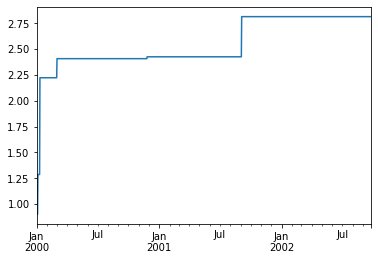

In [75]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [77]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [78]:
kdf = ks.from_pandas(pdf)

In [79]:
kdf = kdf.cummax()

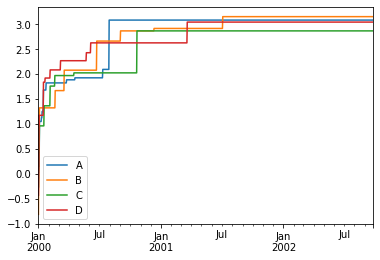

In [80]:
kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

In [83]:
kdf.to_csv('dbfs:/foo.csv')
ks.read_csv('dbfs:/foo.csv').head(10)

,A,B,C,D
0,0.025846,-0.813997,-0.263575,-0.429362
1,0.153572,0.665395,0.426560,0.092980
2,0.153572,0.665395,0.426560,1.171061
3,1.048009,1.321484,0.960315,1.171061
4,1.048009,1.321484,0.960315,1.171061
5,1.048009,1.321484,0.960315,1.171061
6,1.048009,1.321484,0.960315,1.171061
7,1.048009,1.321484,0.960315,1.171061
8,1.048009,1.321484,0.960315,1.171061
9,1.124057,1.321484,0.960315,1.171061


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

In [85]:
kdf.to_parquet('dbfs:/bar.parquet')
ks.read_parquet('dbfs:/bar.parquet').head(10)

,A,B,C,D
0,0.025846,-0.813997,-0.263575,-0.429362
1,0.153572,0.665395,0.426560,0.092980
2,0.153572,0.665395,0.426560,1.171061
3,1.048009,1.321484,0.960315,1.171061
4,1.048009,1.321484,0.960315,1.171061
5,1.048009,1.321484,0.960315,1.171061
6,1.048009,1.321484,0.960315,1.171061
7,1.048009,1.321484,0.960315,1.171061
8,1.048009,1.321484,0.960315,1.171061
9,1.124057,1.321484,0.960315,1.171061


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

In [87]:
kdf.to_spark_io('dbfs:/zoo.orc', format="orc")
ks.read_spark_io('dbfs:/zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.025846,-0.813997,-0.263575,-0.429362
1,0.153572,0.665395,0.426560,0.092980
2,0.153572,0.665395,0.426560,1.171061
3,1.048009,1.321484,0.960315,1.171061
4,1.048009,1.321484,0.960315,1.171061
5,1.048009,1.321484,0.960315,1.171061
6,1.048009,1.321484,0.960315,1.171061
7,1.048009,1.321484,0.960315,1.171061
8,1.048009,1.321484,0.960315,1.171061
9,1.124057,1.321484,0.960315,1.171061
